In [67]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## 명함추출
- 12장

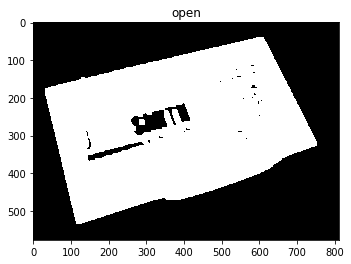

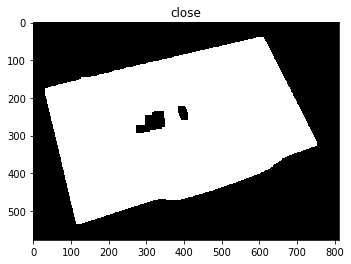

In [4]:
img = cv2.imread('namecard.png', 0)
gray = cv2.GaussianBlur(img, (7, 7), 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)

open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
imshow("open", open)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=3)
imshow("close", closed)

In [5]:
cnts,_ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(cnts[0])

[[[595  40]]

 [[594  41]]

 [[590  41]]

 ...

 [[612  42]]

 [[611  41]]

 [[611  40]]]


In [6]:
c = cnts[0]
peri = cv2.arcLength(c, True)
print(peri)
approx = cv2.approxPolyDP(c, 0.02 * peri, True)
print(approx)

2108.0600863695145
[[[611  40]]

 [[ 32 175]]

 [[114 534]]

 [[751 327]]]


In [7]:
def ordering(approx) :
    ps = approx [:,0]
    cx = np.mean(ps[:,0])     #X좌표
    cy = np.mean(ps[:,1])     #y좌
    pts = np.zeros((4,2), dtype='float32')    #pts1, pts2 타입 맞춰야해서 32
    for p in ps :
        sx = p[0] - cx
        sy = p[1] - cy
        if  sx < 0 and sy < 0  : pts[0] = p
        if  sx > 0 and sy < 0  : pts[1] = p
        if  sx < 0 and sy > 0  : pts[2] = p
        if  sx > 0 and sy > 0  : pts[3] = p    
    return pts

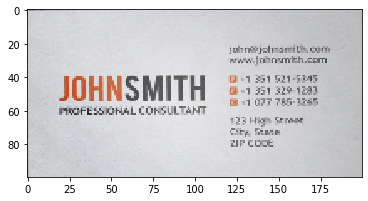

In [8]:
img = cv2.imread('namecard.png')
pts1 = ordering(approx)
pts2 = np.float32([[0,0],[200,0],[0,100],[200,100]]) #pts1, pts2 타입 맞춰야해서 32
M = cv2.getPerspectiveTransform(pts1,pts2)
img_result = cv2.warpPerspective(img, M, (200,100))        
imshow("", img_result)

- 책에 적용

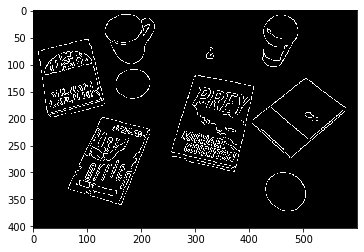

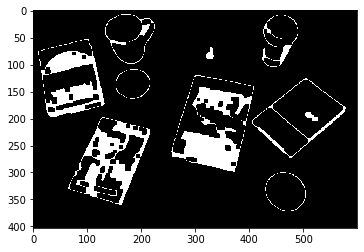

[[127. 198.]
 [216. 223.]
 [ 65. 329.]
 [163. 359.]]


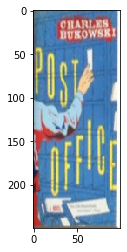

[[  0.   0.]
 [579. 182.]
 [475. 273.]
 [  0.   0.]]


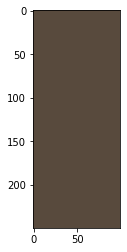

[[301. 120.]
 [408. 141.]
 [257. 269.]
 [373. 298.]]


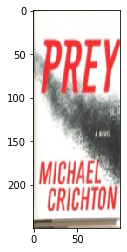

[[ 10.  76.]
 [102.  54.]
 [ 33. 198.]
 [132. 173.]]


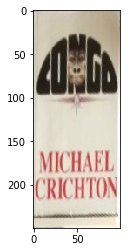

In [28]:
img= cv2.imread("book.jpg")
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray= cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

contours, _= cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)    
    
    if len(approx) == 4 :        
        pts1 = ordering(approx)
        print(pts1)
        pts2 = np.float32([[0,0],[100,0],[0,250],[100,250]]) 
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img_result = cv2.warpPerspective(img, M, (100,250))        
        imshow("", img_result)

# OCR

In [ ]:
print(pytesseract.image_to_string('htext.png', lang='kor'))
# 한글 포함 이미지

img = cv2.imread('htext.png', 0)
print(pytesseract.image_to_string(img, lang='kor'))

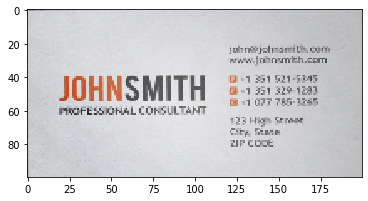

In [9]:
img = cv2.imread('namecard.png')
pts1 = ordering(approx)
pts2 = np.float32([[0,0],[200,0],[0,100],[200,100]]) #pts1, pts2 타입 맞춰야해서 32
M = cv2.getPerspectiveTransform(pts1,pts2)
img_result = cv2.warpPerspective(img, M, (200,100))        
imshow("", img_result)

In [16]:
print(pytesseract.image_to_string(img_result))

JOHNSMITH

 



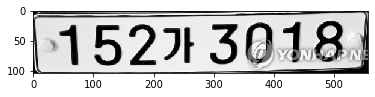

 

15273018.

 



In [18]:
img= cv2.imread("plate2.png",0)
imshow("",img)
print(pytesseract.image_to_string(img))

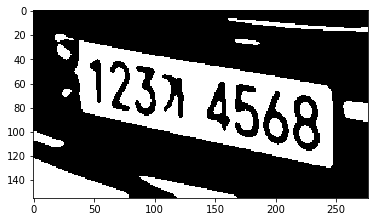

아아



In [44]:
img= cv2.imread("plate3.png",0)
img= cv2.GaussianBlur(img, (11,11), 0)
_,binary= cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("",binary)
print(pytesseract.image_to_string(img, lang= 'kor'))

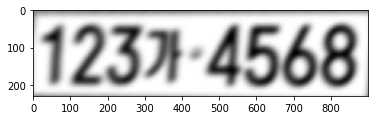

1234-4568



In [45]:
cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)            
    if area >= 10000 and len(approx) == 4 :   
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0],[900,0],[0,230],[900,230]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img_result = cv2.warpPerspective(img , M, (900,230))        
        imshow("", img_result)
        
print(pytesseract.image_to_string(img_result, lang='kor'))

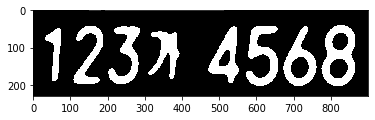

In [46]:
_,binary = cv2.threshold(img_result, 128, 255, cv2.THRESH_BINARY_INV )    
imshow("",binary)

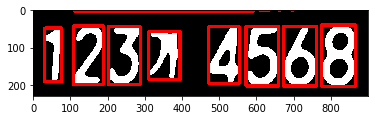

In [48]:
cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_color= cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

for c in cnts:
    x, y, w, h= cv2.boundingRect(c)
    cv2.rectangle(img_color, (x, y), (x+w, y+h), (0,0,255), 8)
imshow("",img_color)

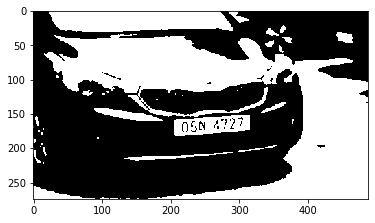

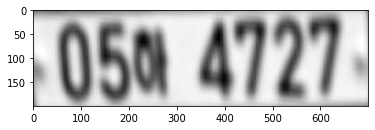

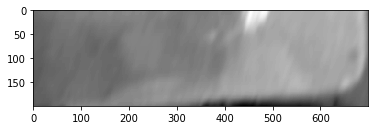

In [63]:
#다른이미지 연습
img= cv2.imread("carnumber.jpg",0)
img= cv2.GaussianBlur(img, (5,5), 0)
_,binary= cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow("",binary)

cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)            
    if area >= 1500 and len(approx) == 4 :   
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0],[700,0],[0,200],[700,200]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img_result = cv2.warpPerspective(img , M, (700,200))        
        imshow("", img_result)
print(pytesseract.image_to_string(img_result, lang='kor'))

# Web 기반 모니터링

In [95]:
%%writefile server.py

from flask import Flask, request
import requests

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요</h1>    
    """
    return  html

datas= []

@app.route('/signal')
def signal():
    global datas
    datas.append(request.args.get("data"))
    return  str(datas)

@app.route('/view')
def view():
    global datas
    return  str(datas)

if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      



Overwriting server.py


In [83]:
response = requests.get("http://localhost:8000")
print(response.text)


    <h1>안녕하세요</h1>    
    


In [84]:
HTML(response.text)  #주피터에서만 사용 함수: 브라우저베이스

In [86]:
response= requests.get("http://localhost:8000/fun?op1=1&op2=3") 
print(response.text)
HTML(response.text)

<font color=blue>4</font>


In [96]:
datas = [7.5, 6.7, 0.5, 3.4]

for data in datas : 
    response = requests.get("http://localhost:8000/signal?data=" + 
                            str(data))  
    print(response.text)

['7.5']
['7.5', '6.7']
['7.5', '6.7', '0.5']
['7.5', '6.7', '0.5', '3.4']
